In [1]:
import sys
sys.path.append('..')
import sponge_networks as sn
import numpy as np
import networkx as nx
import pandas as pd

In [2]:
%%HTML
<style>
.jp-RenderedSVG{
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>

### Ресурсная сеть:

- представляет собой нелинейную модель потока, работающую в дискретном времени
- Вершины сети синхронно перераспределяют некоторый бесконечно делимый ресурс.
- На каждом временном шаге каждая вершина отправляет ресурс всем своим соседям по одному из двух правил с пороговым переключением.
- Выбор правила зависит от количества ресурса в вершине;
  - Если ресурс в вершине больше, чем общая пропускная способность ее исходящих ребер, он отправляет полную пропускную способность каждому ребру;
  - В противном случае вершина отдает весь ресурс, распределяя его пропорционально пропускной способности исходящих ребер;
- Вершины имеют неограниченные емкости.

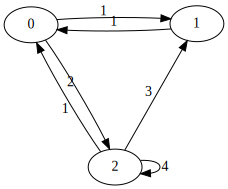

In [3]:
R = np.array([
        [0, 1, 2],
        [1, 0, 0],
        [1, 3, 4]
    ])
simple_graph = nx.from_numpy_array(R, create_using=nx.DiGraph)
rn1 = sn.ResourceNetwork(simple_graph)
rn1.plot(scale=1.2)

- Ресурсы $q_i(t)$ -- неотрицательные числа, присвоенные вершинам $v_i, i = \overline{1,n}$, и изменяющиеся в дискретном времени t.
- Состояние $Q(t)$ c на временном шаге t представляет собой вектор значений ресурсов в каждой вершине:
$$Q(t)=(q_1(t),…,q_n(t)).$$


### Правило функционирования модели:

- На временном шаге t вершина $v_i$ отправляет соседней вершине $v_j$ через ребро $e_{ij}$ количество ресурса $f_{ij}(t)$, равное:
    $$f_{ij}(t)=\left\{
        \begin{array}{ccl}
            r_{ij}, & q_i(t) \geq r^{out}_{i} & -\text{ правило 1} \\
            \frac{r_{ij}}{r^{out}_{i}} q_i(t), & q_i(t) < r^{out}_{i} & -\text{ правило 2} \\
        \end{array}
    \right.$$
- В таком случае, вершина $v_i$ в момент времени $t+1$ получает ресурса:
    $$\sum\limits_{j = 1}^n f_{ij}(t) = q_i(t+1)$$

In [4]:
sim1 = rn1.run_simulation([5, 0, 0])
rn1.plot_simulation(sim1, scale=1.4)

interactive(children=(IntSlider(value=0, description='№ of iteration', max=29), Output()), _dom_classes=('widg…